In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [2]:
import sys
import os 
sys.path.insert(0, os.path.abspath('../packages'))
import steps, functions, optimizers

In [3]:
step = steps.GoldenSectionStep(da = 0.01, tol = 1e-8, check_direction=True, normalize=False)

In [4]:
optimizrs = [
    ('Univariant', optimizers.UnivariantOptimizer(tol=1e-5)),
    ('Powell', optimizers.PowellOptimizer(tol=1e-5)),
    ('Steepest', optimizers.SteepestDescentOptimizer(tol=1e-5)),
    ('FletchRvs', optimizers.FletcherReevesOptimizer(tol=1e-5)),
    ('NewtnRaph', optimizers.NewtonRaphsonOptimizer(tol=1e-5)),
    ('BFGS', optimizers.BFGSOptimizer(tol=1e-5)),
]

## Questão 01

### Item a

In [14]:
def f(x1, x2):

    return x1**2 - 3*x1*x2 + 4*x2**2 + x1 - x2

def gradf(x1, x2):

    return np.array(
        [ 2*x1 - 3*x2 + 1, 
        -3*x1 + 8*x2 - 1]
    )

def hessf(x1, x2):

    return np.array(
        [
        [ 2, -3],
        [-3,  8]
        ]
    )

#f = functions.NumericalSpecialFunction(f)
f = functions.AnalyticalSpecialFunction(f, gradf, hessf)

points = [
    (np.array([2, 2]), 'r'),
    (np.array([-1, -3]), 'b'),
]

Univariant: p_final = [-0.714275, -0.142853, -0.285714].T. Execução:0:00:00.010615, 46 iterações
Univariant: p_final = [-0.714293, -0.142860, -0.285714].T. Execução:0:00:00.014799, 48 iterações
Powell: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.028008, 6 iterações
Powell: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.007219, 6 iterações
Steepest: p_final = [-0.714280, -0.142855, -0.285714].T. Execução:0:00:00.015727, 32 iterações
Steepest: p_final = [-0.714294, -0.142861, -0.285714].T. Execução:0:00:00.003711, 7 iterações
FletchRvs: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.001190, 2 iterações
FletchRvs: p_final = [-0.714286, -0.142858, -0.285714].T. Execução:0:00:00.001488, 2 iterações
NewtnRaph: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.001463, 1 iterações
NewtnRaph: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.000954, 1 iterações
BFGS: p_final = [-0.714286, -0.142857, -0.285714].T. 

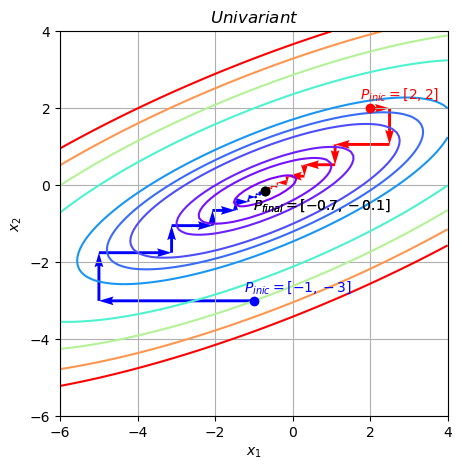

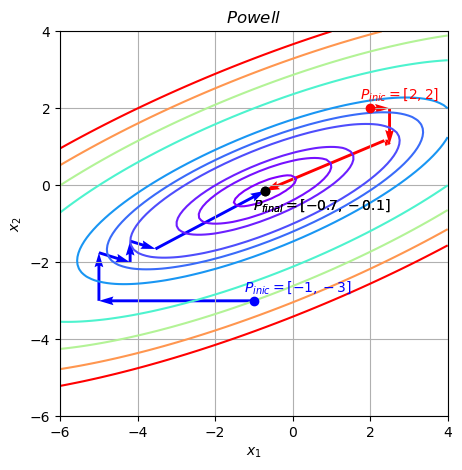

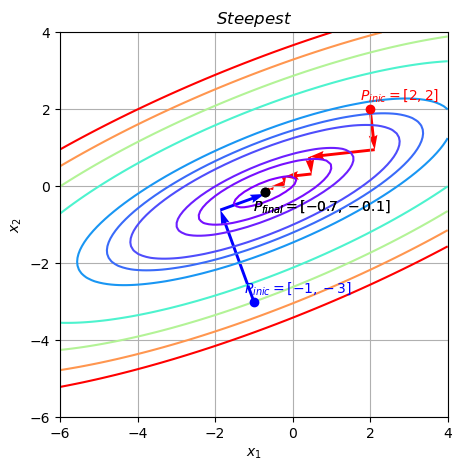

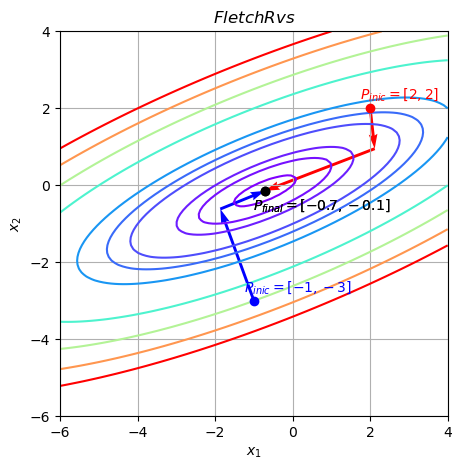

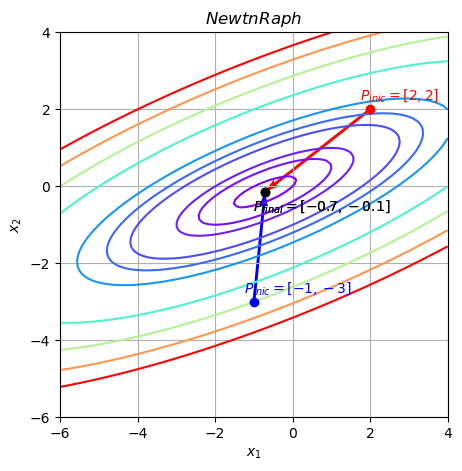

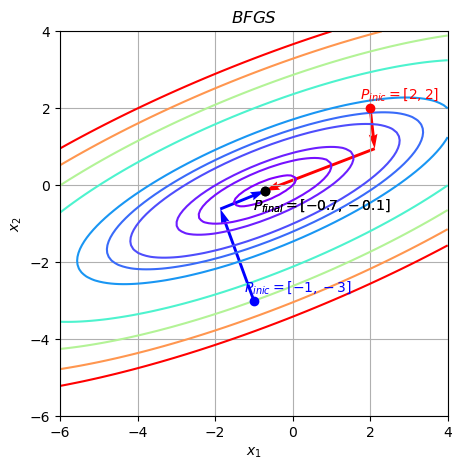

In [15]:
item = 'a'

x = np.linspace(-6, 4, 100)
y = np.linspace(-6, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

levels =[0, 1, 2, 5, 7, 10, 20, 30, 40, 50]

for name, optimizer in optimizrs:
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, levels,cmap='rainbow')
    for p_inicial, color in points:
        t_init = datetime.datetime.now()
        p_final = optimizer(f, p_inicial, step)
        t_final = datetime.datetime.now()
        print(f'{name}: p_final = [{p_final[0]:.6f}, {p_final[1]:.6f}, {f(*p_final):.6f}].T. Execução:{t_final - t_init}, {optimizer.iter} iterações')
        ax.plot(*p_inicial, f'{color}o')
        ax.text(p_inicial[0]-0.25, p_inicial[1]+0.25, f'$P_{{inic}} = [{p_inicial[0]}, {p_inicial[1]}]$', color=color)
        ax.plot(*p_final, 'ko')
        ax.text(p_final[0]-0.3, p_final[1]-0.5, f'$P_{{final}} = [{p_final[0]:.1f}, {p_final[1]:.1f}]$', color='k')
        cache = optimizer.get_history()
        for i in range(len(cache)-1):
            p_i = cache[i]
            p_f = cache[i+1]
            ax.quiver(p_i[0], p_i[1], p_f[0]-p_i[0], p_f[1]-p_i[1], color=color, angles='xy', scale_units='xy', scale=1)#, label='Passo completo')
    ax.grid()
    #ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'${name}$')
    fig.savefig(f'images/q1{item}_{name}.pdf')

### Item b

In [12]:
a = 10
b = 1

def f(x1, x2):

    return (1 + a - b*x1 - b*x2)**2 + (b + x1 + a*x2 - b*x1*x2)**2

def gradf(x1, x2):

    return np.array(
        [ 2*(1 + a - b*x1 - b*x2)*(-b) + 2*(b + x1 + a*x2 - b*x1*x2)*(1-b*x2), 
          2*(1 + a - b*x1 - b*x2)*(-b) + 2*(b + x1 + a*x2 - b*x1*x2)*(a-b*x1)]
    )

def hessf(x1, x2):

    f11 = 2*b**2 + 2*(1-b*x2)**2
    f12 = 2*b**2 + 2*(a-b*x1)*(1-b*x2) - 2*b*(b + x1 + a*x2 - b*x1*x2)
    f22 = 2*b**2 + 2*(a-b*x1)**2
    return np.array(
        [
        [ f11, f12],
        [ f12,  f22]
        ]
    )

f2 = functions.NumericalSpecialFunction(f)
f = functions.AnalyticalSpecialFunction(f, gradf, hessf)

points = [
    (np.array([10, 2]), 'r'),
    (np.array([-2, -3]), 'b'),
]

Univariant: p_final = [13.000001, 3.999999, 40.000000].T. Execução:0:00:00.018687, 65 iterações
Univariant: p_final = [7.000001, -2.000001, 40.000000].T. Execução:0:00:00.018450, 61 iterações
Powell: p_final = [13.000001, 4.000000, 40.000000].T. Execução:0:00:00.010569, 15 iterações
Powell: p_final = [7.000000, -2.000000, 40.000000].T. Execução:0:00:00.031830, 18 iterações
Steepest: p_final = [13.000002, 3.999999, 40.000000].T. Execução:0:00:00.013452, 47 iterações
Steepest: p_final = [7.000002, -2.000002, 40.000000].T. Execução:0:00:00.008716, 42 iterações
FletchRvs: p_final = [13.000001, 3.999999, 40.000000].T. Execução:0:00:00.012557, 64 iterações
FletchRvs: p_final = [7.000000, -2.000000, 40.000000].T. Execução:0:00:00.004483, 21 iterações
NewtnRaph: p_final = [10.000000, 1.000000, 121.000000].T. Execução:0:00:00.001061, 1 iterações
NewtnRaph: p_final = [7.000000, -2.000000, 40.000000].T. Execução:0:00:00.005945, 6 iterações
BFGS: p_final = [13.000000, 4.000000, 40.000000].T. Execu

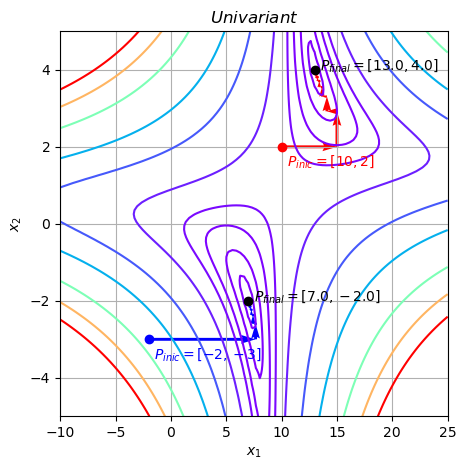

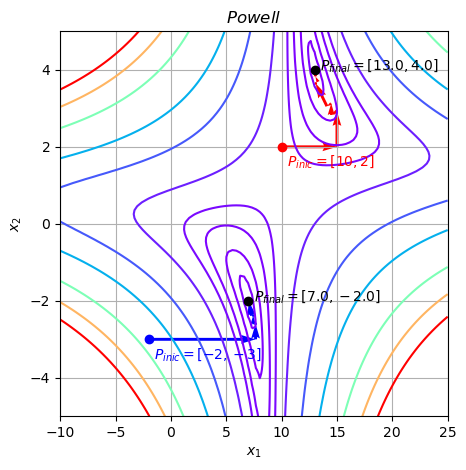

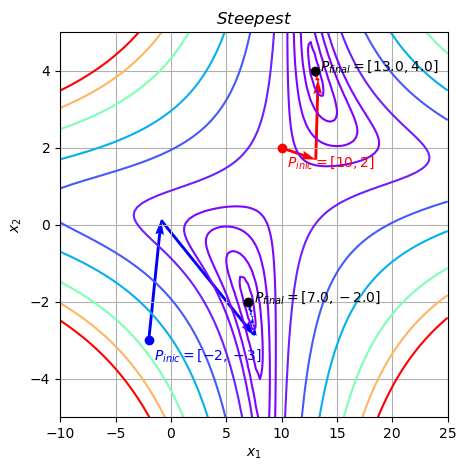

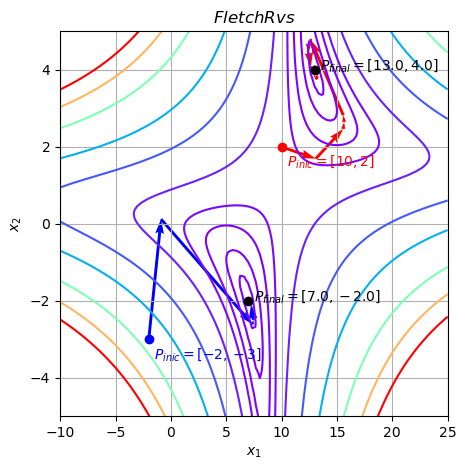

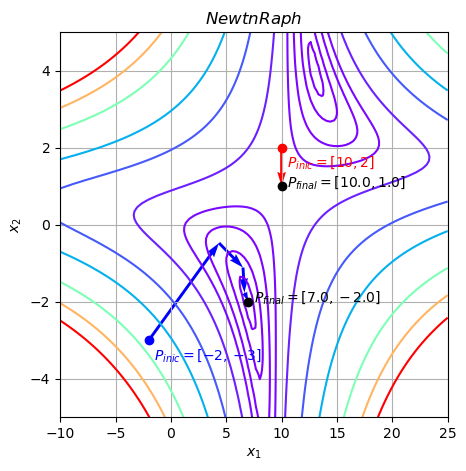

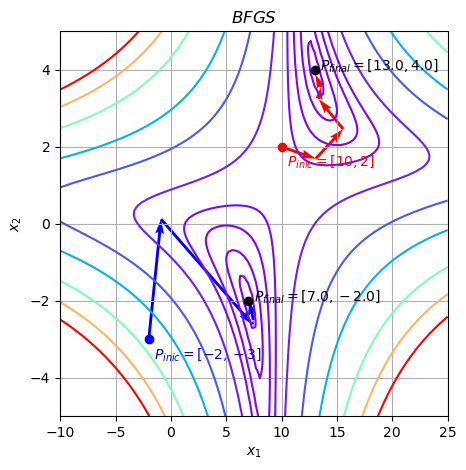

In [13]:
item = 'b'

x = np.linspace(-10, 25, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

levels = [40, 42, 50, 70, 100, 200, 500, 1000, 2000, 3000, 4000]


for name, optimizer in optimizrs:
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, levels,cmap='rainbow')
    for p_inicial, color in points:
        t_init = datetime.datetime.now()
        p_final = optimizer(f, p_inicial, step)
        t_final = datetime.datetime.now()
        print(f'{name}: p_final = [{p_final[0]:.6f}, {p_final[1]:.6f}, {f(*p_final):.6f}].T. Execução:{t_final - t_init}, {optimizer.iter} iterações')
        ax.plot(*p_inicial, f'{color}o')
        ax.text(p_inicial[0]+0.5, p_inicial[1]-0.5, f'$P_{{inic}} = [{p_inicial[0]}, {p_inicial[1]}]$', color=color)
        ax.plot(*p_final, 'ko')
        ax.text(p_final[0]+0.5, p_final[1]+0.0, f'$P_{{final}} = [{p_final[0]:.1f}, {p_final[1]:.1f}]$', color='k')
        cache = optimizer.get_history()
        for i in range(len(cache)-1):
            p_i = cache[i]
            p_f = cache[i+1]
            ax.quiver(p_i[0], p_i[1], p_f[0]-p_i[0], p_f[1]-p_i[1], color=color, angles='xy', scale_units='xy', scale=1)#, label='Passo completo')
    ax.grid()
    #ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'${name}$')
    fig.savefig(f'images/q1{item}_{name}.pdf')

## Questão 02

### Item a

In [9]:
L1 = 30.0
L2 = 30.0
EA1 = 27000.0
EA2 = 18000.0
rho1 = 8.0
rho2 = 16.0

def f(x1, x2):

    return 0.5*EA1/L1 * (np.sqrt((L1 + x1)**2 + x2**2) - L1) **2 + 0.5*EA2/L2 * (np.sqrt((L2 - x1)**2 + x2**2) - L2) **2 - (rho1*L1/2.0 + rho2*L2/2.0)*x2

def gradf(x1, x2):

    return np.array(
        [ 2*x1 - 3*x2 + 1, 
        -3*x1 + 8*x2 - 1]
    )

def hessf(x1, x2):

    return np.array(
        [
        [ 2, -3],
        [-3,  8]
        ]
    )

f = functions.NumericalSpecialFunction(f)
#f = functions.AnalyticalSpecialFunction(f, gradf, hessf)

points = [
    (np.array([0.01, -0.10]), 'k'),
    #(np.array([-1, -3]), 'b'),
]

Univariant: p_final = [-0.205109, 7.788993, -2091.657428].T. Execução:0:00:00.102505, 69 iterações
Powell: p_final = [-0.205109, 7.788993, -2091.657428].T. Execução:0:00:58.044606, 28 iterações
Steepest: p_final = [-0.205109, 7.788993, -2091.657428].T. Execução:0:00:00.018570, 13 iterações
FletchRvs: p_final = [-0.205109, 7.788993, -2091.657428].T. Execução:0:00:00.018601, 14 iterações
NewtnRaph: p_final = [-0.205109, 7.788993, -2091.657428].T. Execução:0:00:00.583505, 200 iterações
BFGS: p_final = [-0.205109, 7.788993, -2091.657428].T. Execução:0:00:00.011486, 6 iterações


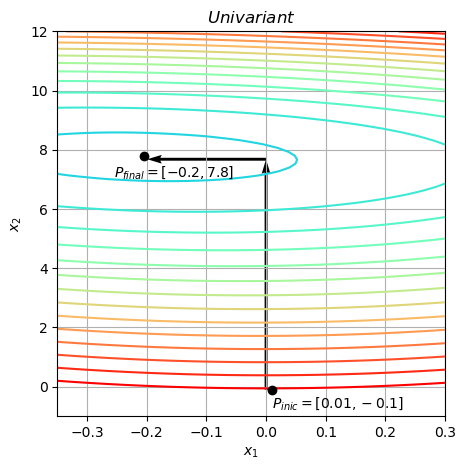

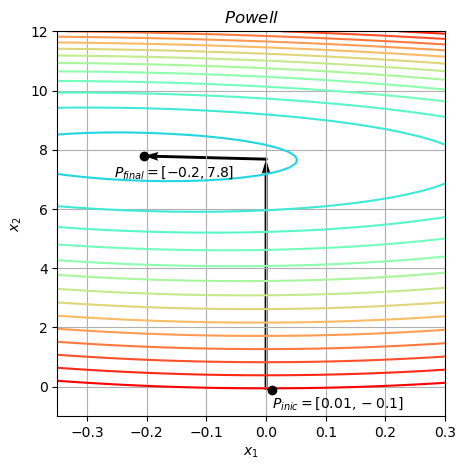

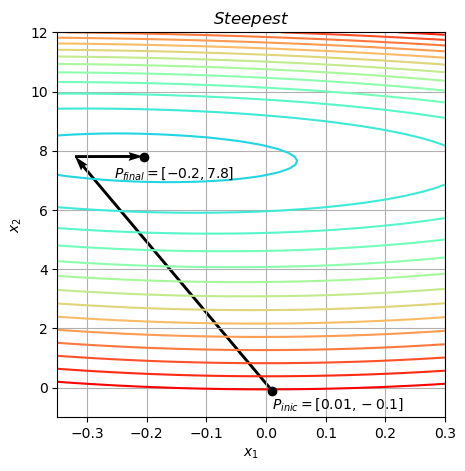

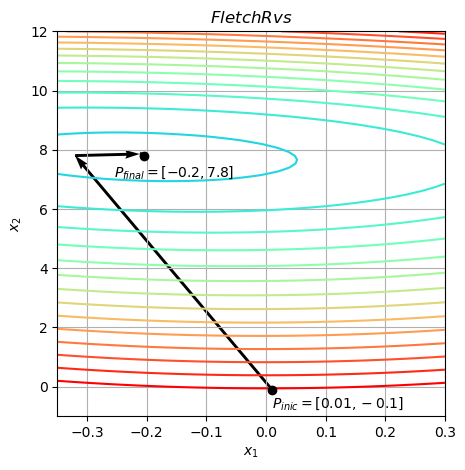

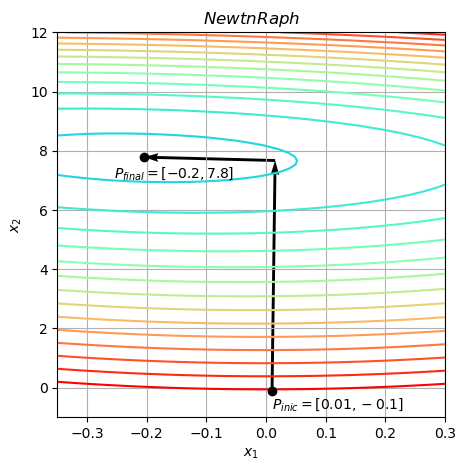

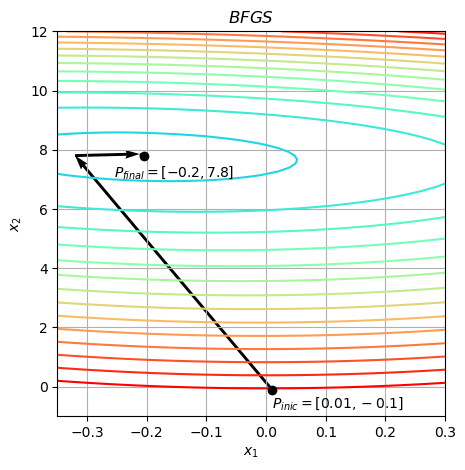

In [11]:
item = 'a'

x = np.linspace(-0.35, 0.3, 100)
y = np.linspace(-1, 12, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

levels = np.linspace(-3000,20, 20)


for name, optimizer in optimizrs:
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax = [ax]
    ax[0].contour(X, Y, Z, levels,cmap='rainbow')
    #ax[1].plot([0, 60], [0,0], 'b')
    for p_inicial, color in points:
        t_init = datetime.datetime.now()
        p_final = optimizer(f, p_inicial, step)
        t_final = datetime.datetime.now()
        print(f'{name}: p_final = [{p_final[0]:.6f}, {p_final[1]:.6f}, {f(*p_final):.6f}].T. Execução:{t_final - t_init}, {optimizer.iter} iterações')
        ax[0].plot(*p_inicial, f'{color}o')
        ax[0].text(p_inicial[0], p_inicial[1]-0.6, f'$P_{{inic}} = [{p_inicial[0]}, {p_inicial[1]}]$', color=color)
        ax[0].plot(*p_final, 'ko')
        ax[0].text(p_final[0]-0.05, p_final[1]-0.7, f'$P_{{final}} = [{p_final[0]:.1f}, {p_final[1]:.1f}]$', color='k')
        cache = optimizer.get_history()
        for i in range(len(cache)-1):
            p_i = cache[i]
            p_f = cache[i+1]
            ax[0].quiver(p_i[0], p_i[1], p_f[0]-p_i[0], p_f[1]-p_i[1], color=color, angles='xy', scale_units='xy', scale=1)#, label='Passo completo')
            #ax[1].plot([0, 30+p_f[0], 60], [0, -p_f[1], 0], color='red', alpha=0.2)
            #ax[1].quiver(30 + p_i[0], -p_i[1], p_f[0]-p_i[0], -p_f[1]+p_i[1], color='red', alpha=0.2, angles='xy', scale_units='xy', scale=1)
    ax[0].grid()
    #ax[1].grid()
    #ax.legend()
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')
    ax[0].set_title(f'${name}$')
    fig.savefig(f'images/q2{item}_{name}.pdf')

### Item b

In [28]:
class SpringConvergence(functions.NumericalSpecialFunction):

    def __init__(self, EA1, EA2, L1, L2, rho1, rho2, n_elems):

        self.EA1 = EA1
        self.EA2 = EA2
        self.L1 = L1
        self.dL1 = L1 / n_elems
        self.L2 = L2
        self.dL2 = L2/ n_elems
        self.rho1 = rho1
        self.rho2 = rho2
        self.n_elems = n_elems
        self.expected_shape = (2*n_elems-1, 2)
        super().__init__(self)

    def generate_start(self):

        return np.zeros(self.expected_shape).reshape((-1,))
    
    def to_shape(self, input):

        input = input.reshape(-1,2)
        zero_extreme = np.zeros((2,))
        input = np.vstack([
            zero_extreme,
            input,
            zero_extreme.copy(),
        ])

        return input
    
    def summarize(self, input):

        input = self.to_shape(input)
        end_input = input.shape[0]

        center = input[self.n_elems,:].copy()
        L_accum = 0
        for i in range(self.n_elems):
            L_accum += self.dL1
            input[i+1,0] += L_accum
            input[i+1,1] *= -1.0

        #Parte 1: Loop na mola 02
        for i in range(self.n_elems, end_input-1):
            L_accum += self.dL2
            input[i+1,0] += L_accum
            input[i+1,1] *= -1.0
            

        return center, input


    def elastic_term(self, x0, x1, EA, dL):

        return 0.5*EA/dL * (np.sqrt((dL - x0[0] + x1[0])**2 + (x1[1] - x0[1])**2) - dL) **2
    
    def elastic_grad(self, x0, x1, EA, dL):

        C = EA/dL
        dLf = np.sqrt((dL - x0[0] + x1[0])**2 + (x1[1] - x0[1])**2)
        dLX = (dL - x0[0] + x1[0])
        dLY = (x1[1] - x0[1])

        grad22 = [
            [ dLX, dLY],
            [-dLX, -dLY],
        ]
        return grad22 * C * (1.0 - dL/dLf)
    
    def gravitational_term(self, x0, x1, rho, dL):

        return  - 0.5*rho*dL*(x0[1] + x1[1])
    
    def gravitational_grad(self, x0, x1, rho, dL):

        grad22 = [
            [ 0, 0],
            [ 1, 1],
        ]

        return - 0.5*rho*dL*grad22
    
    def __call__(self, *pargs):
        
        input = np.array(pargs)
        input = input.reshape(-1,2)
        zero_extreme = np.zeros((2,))
        input = np.vstack([
            zero_extreme,
            input,
            zero_extreme.copy(),
        ])

        end_input = input.shape[0]

        potential_energy = 0.0

        #Parte 1: Loop na mola 01
        for i in range(self.n_elems):
            x0 = input[i,:]
            x1 = input[i+1,:]
            potential_energy += self.elastic_term(x0, x1, self.EA1, self.dL1)
            potential_energy += self.gravitational_term(x0, x1, self.rho1, self.dL1)

        #Parte 1: Loop na mola 02
        for i in range(self.n_elems, end_input-1):
            x0 = input[i,:]
            x1 = input[i+1,:]
            potential_energy += self.elastic_term(x0, x1, self.EA2, self.dL2)
            potential_energy += self.gravitational_term(x0, x1, self.rho2, self.dL2)

        return potential_energy


L1 = 30.0
L2 = 30.0
EA1 = 27000.0
EA2 = 18000.0
rho1 = 8.0
rho2 = 16.0


f_list = [SpringConvergence(EA1, EA2, L1, L2, rho1, rho2, n_elems=i) for i in [1, 2, 4, 6, 8]]
    


In [29]:
step = steps.GoldenSectionStep(da = 0.001, tol = 1e-8, check_direction=True, normalize=True)

optimizrs = [
    ('Univariant', optimizers.UnivariantOptimizer(tol=1e-3, max_iter=500)),
    ('Powell', optimizers.PowellOptimizer(tol=1e-3, max_iter=500)),
    ('Steepest', optimizers.SteepestDescentOptimizer(tol=1e-3, max_iter=500)),
    ('FletchRvs', optimizers.FletcherReevesOptimizer(tol=1e-3, max_iter=500)),
    ('NewtnRaph', optimizers.NewtonRaphsonOptimizer(tol=1e-3, max_iter=500)),
    ('BFGS', optimizers.BFGSOptimizer(tol=1e-3, max_iter=500)),
]

Univariant: Centro: [-0.20510876930584296, 7.788989833395233].T. Execução:0:00:00.286882, 9 iterações
Univariant: Centro: [-0.08630344033227122, 7.170007209342255].T. Execução:0:00:01.708518, 152 iterações
Univariant: Centro: [-0.06893925722050917, 7.049274901287609].T. Execução:0:00:09.800015, 500 iterações
Univariant: Centro: [-0.15040587562373367, 6.960725197975265].T. Execução:0:00:18.540453, 500 iterações
Univariant: Centro: [-0.246964323348396, 6.270592615837882].T. Execução:0:00:29.059371, 500 iterações
Powell: Centro: [-0.20510874096754245, 7.788992400393975].T. Execução:0:00:00.282601, 13 iterações
Powell: Centro: [-0.07095033566255746, 7.163990094548262].T. Execução:0:00:03.661540, 500 iterações
Powell: Centro: [0.036763122595736816, 6.789494485531107].T. Execução:0:00:09.739492, 500 iterações
Powell: Centro: [-0.3053580644311711, 6.104701842801268].T. Execução:0:00:17.908684, 500 iterações
Powell: Centro: [-0.29387510187587157, 5.8036399525652955].T. Execução:0:00:28.633370,

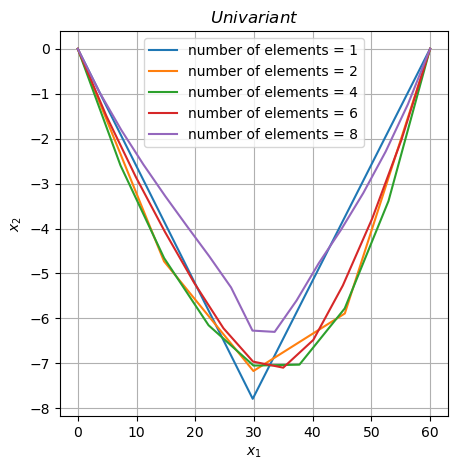

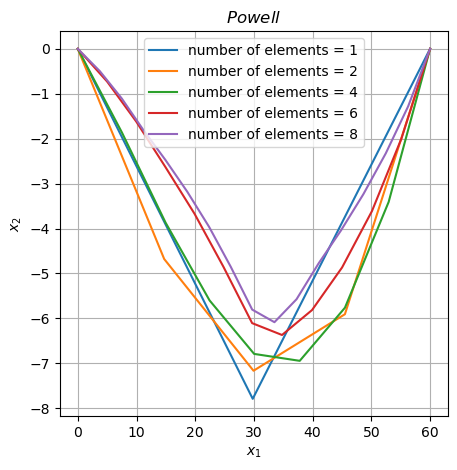

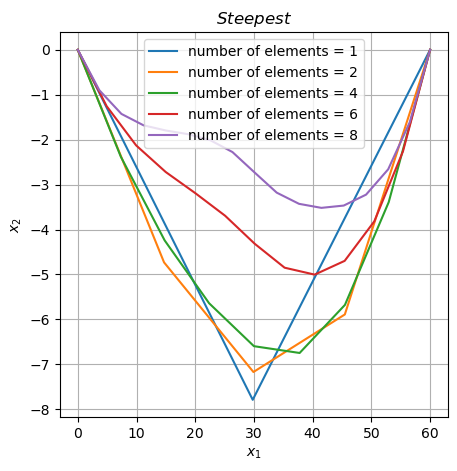

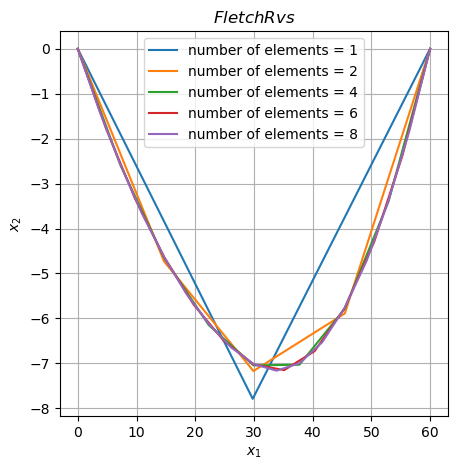

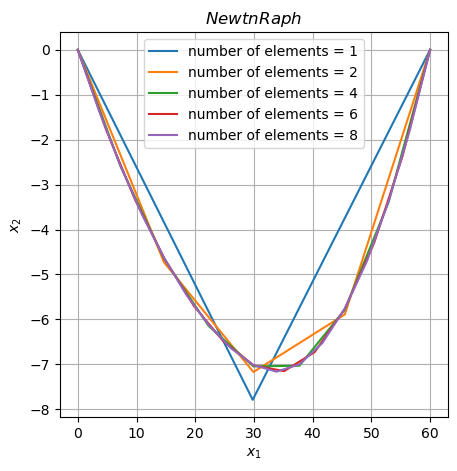

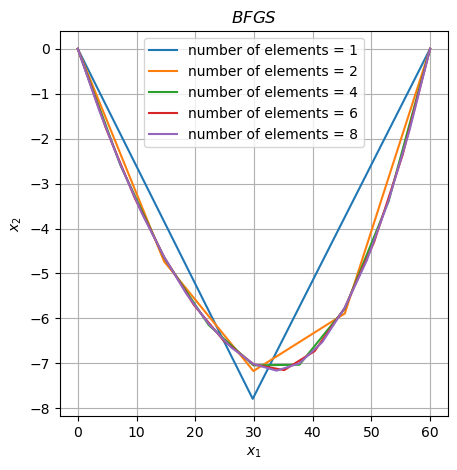

In [30]:
item = 'b'

x = np.linspace(-0.35, 0.3, 100)
y = np.linspace(-1, 12, 100)
X, Y = np.meshgrid(x, y)
#Z = f(X, Y)

levels = np.linspace(-3000,20, 20)


for name, optimizer in optimizrs:
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax = [ax]
    #ax[0].contour(X, Y, Z, levels,cmap='rainbow')
    #ax[1].plot([0, 60], [0,0], 'b')
    for f in f_list:
        p_inicial = f.generate_start()
        t_init = datetime.datetime.now()
        p_final = optimizer(f, p_inicial, step)
        t_final = datetime.datetime.now()
        center, xy_final = f.summarize(p_final)
        print(f'{name}: Centro: [{center[0]}, {center[1]}].T. Execução:{t_final - t_init}, {optimizer.iter} iterações')
        ax[0].plot(xy_final[:,0], xy_final[:,1], label=f'number of elements = {f.n_elems}')
    ax[0].grid()
    #ax[1].grid()
    ax[0].legend()
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')
    ax[0].set_title(f'${name}$')
    fig.savefig(f'images/q2{item}_{name}.pdf')